In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv(r'C:\Users\rahul\Desktop\Datasets\titanic_train.csv', index_col=0)

In [3]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data Preprocessing

In [4]:
train.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)

In [51]:
train['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [5]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [6]:
train.fillna(train.mean(), inplace=True)

In [7]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [8]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [9]:
#Here, I am finding the rows which are carrying NaN values

train[train['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
62,1,1,female,38.0,0,0,80.0,NaN
830,1,1,female,62.0,0,0,80.0,NaN


In [10]:
#Here, I have dropped the 62th and 830th row

train.drop([62,830], axis=0, inplace=True)

In [11]:
train[train['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,


In [12]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

Converting Categorical type to Numerical type using One Hot Encoding

In [14]:
train = pd.get_dummies(train, columns=['Sex','Embarked'])

In [15]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [16]:
train.drop(['Sex_male','Embarked_S'], axis=1, inplace=True)

In [17]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,0
3,1,3,26.0,0,0,7.9250,1,0,0
4,1,1,35.0,1,0,53.1000,1,0,0
5,0,3,35.0,0,0,8.0500,0,0,0


X contains features variables

y contains target variable

In [18]:
X = train.drop('Survived', axis=1)

In [19]:
y= train['Survived']

In [20]:
train.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female      uint8
Embarked_C      uint8
Embarked_Q      uint8
dtype: object

In [21]:
train.shape

(889, 9)

Splitting the model

In [22]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logreg = LogisticRegression()

# Fitting the Model with Default threshold 0.50 

In [26]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
preds_50 = logreg.predict(X_test)

Evaluating the Model using Accuracy, Classification Report, Confusion Matrix

In [58]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve,roc_auc_score, precision_recall_curve

In [29]:
print('Accuracy for Default Threshold 0.50 is' ,accuracy_score(y_test, preds_50))

Accuracy for Default Threshold 0.50 is 0.8027210884353742


In [33]:
print(classification_report(y_test, preds_50))

             precision    recall  f1-score   support

          0       0.84      0.85      0.84       184
          1       0.74      0.73      0.73       110

avg / total       0.80      0.80      0.80       294



In [34]:
print(confusion_matrix(y_test, preds_50))

[[156  28]
 [ 30  80]]


In [59]:
print('AUC Score is :', roc_auc_score(y_test, preds_50))

AUC Score is : 0.7875494071146245


Text(0.5,1,'ROC Curve - Threshold 0.50')

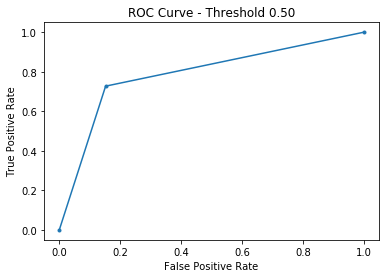

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, preds_50)
plt.plot(fpr,tpr,marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Threshold 0.50')

Text(0.5,1,'Precision-Recall Curve - Threshold 0.50')

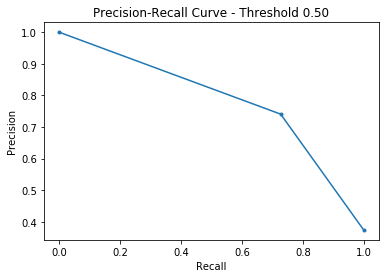

In [62]:
precision, recall, thresholds = precision_recall_curve(y_test, preds_50)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Threshold 0.50')

# Fitting the model with Threshold = 0.3

In [40]:
logreg.fit(X_train, y_train)
THRESHOLD1 = 0.3
preds_30 = logreg.predict_proba(X_test)[:,1:] > THRESHOLD1

In [41]:
print('Accuracy for Threshold 0.30 is' ,accuracy_score(y_test, preds_30))

Accuracy for Threshold 0.30 is 0.7687074829931972


In [42]:
print(classification_report(y_test,preds_30))

             precision    recall  f1-score   support

          0       0.90      0.71      0.79       184
          1       0.64      0.86      0.74       110

avg / total       0.80      0.77      0.77       294



In [43]:
print(confusion_matrix(y_test, preds_30))

[[131  53]
 [ 15  95]]


In [60]:
print('AUC Score is :', roc_auc_score(y_test, preds_30))

AUC Score is : 0.7877964426877471


Text(0.5,1,'ROC Curve - Threshold 0.30')

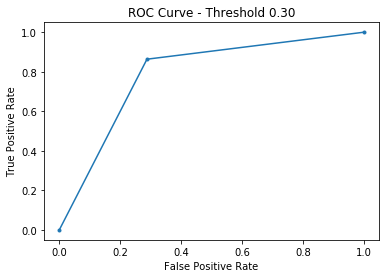

In [56]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, preds_30)
plt.plot(fpr2,tpr2,marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Threshold 0.30')

Text(0.5,1,'Precision-Recall Curve - Threshold 0.30')

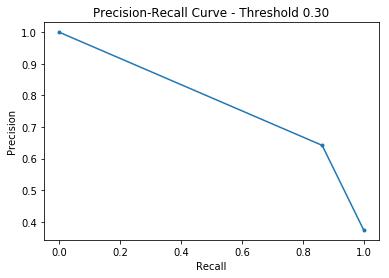

In [63]:
precision, recall, thresholds = precision_recall_curve(y_test, preds_30)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Threshold 0.30')

# Fitting Model with Threshold 0.75 

In [45]:
logreg.fit(X_train, y_train)
THRESHOLD2 = 0.75
preds_75 = logreg.predict_proba(X_test)[:,1:] > THRESHOLD2

In [76]:
print('Accuracy for Threshold 0.75 is' ,accuracy_score(y_test, preds_75))

Accuracy for Threshold 0.75 is 0.7959183673469388


In [72]:
print(classification_report(y_test, preds_75))

             precision    recall  f1-score   support

          0       0.77      0.96      0.86       184
          1       0.89      0.52      0.66       110

avg / total       0.81      0.80      0.78       294



In [73]:
print(confusion_matrix(y_test, preds_75))

[[177   7]
 [ 53  57]]


In [74]:
print('AUC Score is :', roc_auc_score(y_test, preds_75))

AUC Score is : 0.7400691699604742


Text(0.5,1,'ROC Curve - Threshold 0.75')

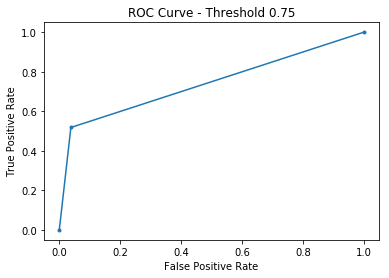

In [71]:
fpr3, tpr3, thresholds3 = roc_curve(y_test, preds_75)
plt.plot(fpr3,tpr3,marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Threshold 0.75')

Text(0.5,1,'Precision-Recall Curve - Threshold 0.75')

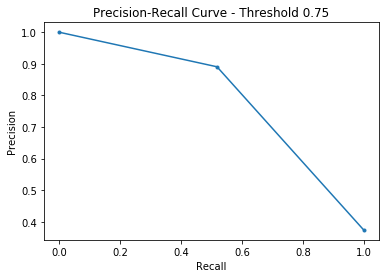

In [70]:
precision, recall, thresholds = precision_recall_curve(y_test, preds_75)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Threshold 0.75')

In [79]:
from sklearn.metrics import precision_score

print("Precision score for threshold 0.3 : {}".format(precision_score(y_test,preds_30)))
print("Precision score for threshold 0.5 : {}".format(precision_score(y_test,preds_50)))
print("Precision score for threshold 0.75 : {}".format(precision_score(y_test,preds_75)))

Precision score for threshold 0.3 : 0.6418918918918919
Precision score for threshold 0.5 : 0.7407407407407407
Precision score for threshold 0.75 : 0.890625


In [80]:
from sklearn.model_selection import cross_val_score

In [81]:
cv_accuracy  = cross_val_score(estimator=logreg, X=X_train, y=y_train, cv=10)

In [82]:
print(np.mean(cv_accuracy))

0.7897175141242937


In [83]:
print(np.std(cv_accuracy))

0.047858843431850324


In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
parameters = {
    
    'C' : [1.0,2.0,3.0,4.0],
    'max_iter' : [100,150,200,250],
    
    'verbose' : [0,1,2,3]}

In [86]:
grid_search = GridSearchCV(estimator=logreg, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)

In [87]:
grid_search2 = grid_search.fit(X_train, y_train)

In [88]:
grid_search2.best_params_

{'C': 2.0, 'max_iter': 100, 'verbose': 0}

In [89]:
grid_search2.best_score_

0.7932773109243697